# **Import libraries**

In [2]:
#import
import cv2

import os

import shutil

import zipfile

import random

from imutils import paths

from glob import glob

from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from skimage.morphology import area_closing, area_opening


import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import missingno as msno

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
# ===
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit

import numpy as np

In [3]:
 #Connect google drive with colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Extract Zip folder from google drive.
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/GP2.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /content folder
zip_ref.close()

# **COVID-19 Radiography Database**

## COVID-19 images

In [5]:
#Import the COVID-19 images
COVID_IMAGE_PATH = "/content/GP2/Datasets/Imaging Based/Dataset(B)/Images/COVID"

## Normal images

In [6]:
#Create Normal image folder
NORMAL_IMAGE_PATH = "/content/GP2/Datasets/Imaging Based/Dataset(B)/Images/Normal"
TARGET_DIR = "/content/GP2/Datasets/Imaging Based/Dataset(B)/Images/Normal_Work"
if not os.path.exists(TARGET_DIR):
  os.mkdir(TARGET_DIR)
  print("Normal_Work folder created")

Normal_Work folder created


In [7]:
#Copying 3616 random images to match the number of COVID-19 images.
normal_image_names = os.listdir(NORMAL_IMAGE_PATH)
random.seed(5)
random.shuffle(normal_image_names)
for i in range(3616):
  image_name = normal_image_names[i]
  image_path = os.path.join(NORMAL_IMAGE_PATH,image_name)
  target_path = os.path.join(TARGET_DIR,image_name)
  shutil.copy2(image_path,target_path)
  print("Copying",i)

Copying 0
Copying 1
Copying 2
Copying 3
Copying 4
Copying 5
Copying 6
Copying 7
Copying 8
Copying 9
Copying 10
Copying 11
Copying 12
Copying 13
Copying 14
Copying 15
Copying 16
Copying 17
Copying 18
Copying 19
Copying 20
Copying 21
Copying 22
Copying 23
Copying 24
Copying 25
Copying 26
Copying 27
Copying 28
Copying 29
Copying 30
Copying 31
Copying 32
Copying 33
Copying 34
Copying 35
Copying 36
Copying 37
Copying 38
Copying 39
Copying 40
Copying 41
Copying 42
Copying 43
Copying 44
Copying 45
Copying 46
Copying 47
Copying 48
Copying 49
Copying 50
Copying 51
Copying 52
Copying 53
Copying 54
Copying 55
Copying 56
Copying 57
Copying 58
Copying 59
Copying 60
Copying 61
Copying 62
Copying 63
Copying 64
Copying 65
Copying 66
Copying 67
Copying 68
Copying 69
Copying 70
Copying 71
Copying 72
Copying 73
Copying 74
Copying 75
Copying 76
Copying 77
Copying 78
Copying 79
Copying 80
Copying 81
Copying 82
Copying 83
Copying 84
Copying 85
Copying 86
Copying 87
Copying 88
Copying 89
Copying 90
Copying 9

## Preprocessing the dataset

In [9]:
#Create function that convert images into numerical and return dataframe
def get_properties(name):
  array = []
  print(name)
  if name == "COVID-19":
    filepaths = "/content/GP2/Datasets/Imaging Based/Dataset(B)/Images/COVID"
  if name == "Normal":
    filepaths = "/content/GP2/Datasets/Imaging Based/Dataset(B)/Images/Normal_Work"
 

  print(filepaths)
  CATEGORIES = ['Covid-19','Normal']
  properties = ['area','convex_area','bbox_area','major_axis_length', 'minor_axis_length', 'perimeter', 'equivalent_diameter', 'mean_intensity', 'solidity', 'eccentricity']
  counter = 1
  dataframe = pd.DataFrame(columns=properties)
  for img in os.listdir(filepaths):
      print(counter)
      image = cv2.imread(os.path.join(filepaths,img))
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      image = cv2.resize(image, (512,512))
      image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
      thresh ,binarized_image = cv2.threshold(image_gray, 128, 255,cv2.THRESH_BINARY)

      closed = area_closing(binarized_image)
      opened = area_opening(closed)

      label_image = label(opened)
      #label_image = label(binarized_image)
      #regions = regionprops(label_image)
      data = pd.DataFrame(regionprops_table(label_image, image_gray,properties=properties))
      data = data[(data.index!=0) & (data.area>100)]
      dataframe = pd.concat([dataframe, data])
      counter += 1
      array.append([1,label_image])
  return dataframe

In [10]:
#Using the function to convert the COVID-19 images into dataframe
covid = get_properties("COVID-19")
covid['Finding'] = 'Covid-19'

COVID-19
/content/GP2/Datasets/Imaging Based/Dataset(B)/Images/COVID
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260

In [11]:
#Using the function to convert the Normal images into dataframe
normal = get_properties('Normal')
normal['Finding'] = 'Normal'

Normal
/content/GP2/Datasets/Imaging Based/Dataset(B)/Images/Normal_Work
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259

In [12]:
#Create new dataframe that combine covid and normal
CombineDataset = pd.concat([covid,normal])

In [13]:
#Create final dataframe to expand the features from 10 to 16
CombineDataset['ratio_length'] = (CombineDataset['major_axis_length'] / CombineDataset['minor_axis_length'])
CombineDataset['perimeter_ratio_major'] = (CombineDataset['perimeter'] / CombineDataset['major_axis_length'])
CombineDataset['perimeter_ratio_minor'] = (CombineDataset['perimeter'] / CombineDataset['minor_axis_length'])
CombineDataset['area_ratio_convex'] = CombineDataset['area'] / CombineDataset['convex_area']
CombineDataset['area_ratio_bbox'] = CombineDataset['area'] / CombineDataset['bbox_area']
CombineDataset['peri_over_dia'] = CombineDataset['perimeter'] / CombineDataset['equivalent_diameter']
Final_dataframe = CombineDataset[CombineDataset.drop('Finding', axis=1).columns].astype(float)
Final_dataframe= Final_dataframe.replace(np.inf, 0)
Final_dataframe['Finding'] = CombineDataset['Finding']

In [14]:
ExcelFile = pd.ExcelWriter('COVID-19 Radiography Database.xlsx')
# write dataframe to excel
Final_dataframe.to_excel(ExcelFile)
# save the excel  
ExcelFile.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


# **Testing the Dataset**

## #1 Load Dataset

In [16]:
url_utf = '/content/COVID-19 Radiography Database.csv'
data = pd.read_csv(url_utf, encoding = "utf-8")

## #2 Preprocessing

In [17]:
#Remove the Unnamed: 0 feature
print(data.nunique())
data = data.drop('Unnamed: 0', axis=1)
print(data.shape)

Unnamed: 0                  23
area                      4799
convex_area               5319
bbox_area                 4528
major_axis_length        16857
minor_axis_length        16854
perimeter                 9879
equivalent_diameter       4799
mean_intensity           16508
solidity                 12812
eccentricity             16852
ratio_length             16854
perimeter_ratio_major    16857
perimeter_ratio_minor    16854
area_ratio_convex        12812
area_ratio_bbox          12126
peri_over_dia            16427
Finding                      2
dtype: int64
(16962, 17)


In [18]:
#Check if there a missing data
data.isna().mean().round(4) * 100

area                     0.0
convex_area              0.0
bbox_area                0.0
major_axis_length        0.0
minor_axis_length        0.0
perimeter                0.0
equivalent_diameter      0.0
mean_intensity           0.0
solidity                 0.0
eccentricity             0.0
ratio_length             0.0
perimeter_ratio_major    0.0
perimeter_ratio_minor    0.0
area_ratio_convex        0.0
area_ratio_bbox          0.0
peri_over_dia            0.0
Finding                  0.0
dtype: float64

In [19]:
#Convert the target value into 1 and 0
print(data.groupby('Finding').size())
data.loc[data["Finding"] == "Covid-19", "Finding"] = 1
data.loc[data["Finding"] == "Normal", "Finding"] = 0
print(data.groupby('Finding').size())

Finding
Covid-19    7857
Normal      9105
dtype: int64
Finding
0    9105
1    7857
dtype: int64


In [20]:
# split all the data
X = data.drop('Finding', axis=1)
y = data['Finding']


# Split the data with high collareation.
''' X = data.drop(['Finding', 'convex_area', 'bbox_area', 'major_axis_length',
               'minor_axis_length', 'perimeter', 'equivalent_diameter',
               'area_ratio_convex', 'perimeter_ratio_minor'], axis=1)
y = data['Finding']  '''
#convert the the target variable from unknow object into int
y=y.astype('int')

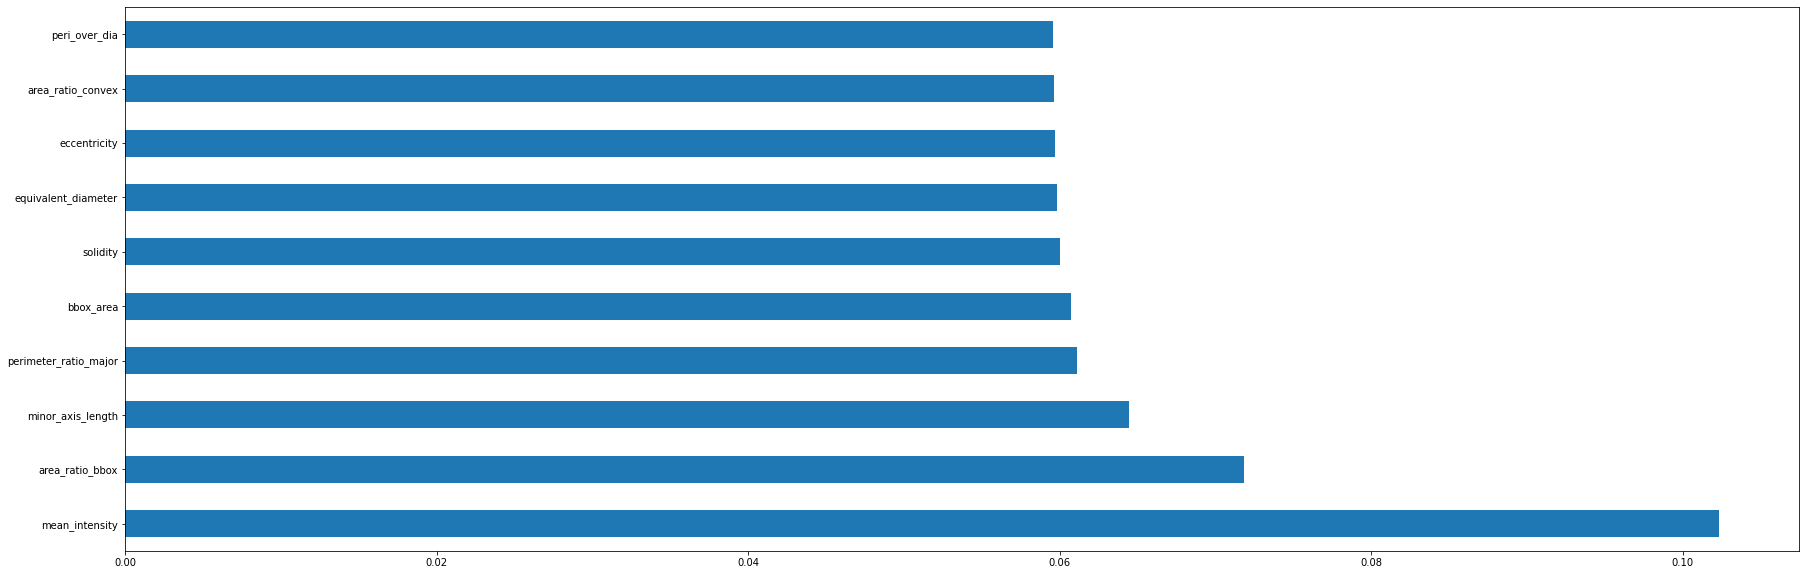

In [21]:
#use inbuilt class feature_importances of tree based classifiers
model = ExtraTreesClassifier()
model.fit(X, y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(figsize=(30, 10), kind='barh')
plt.show()

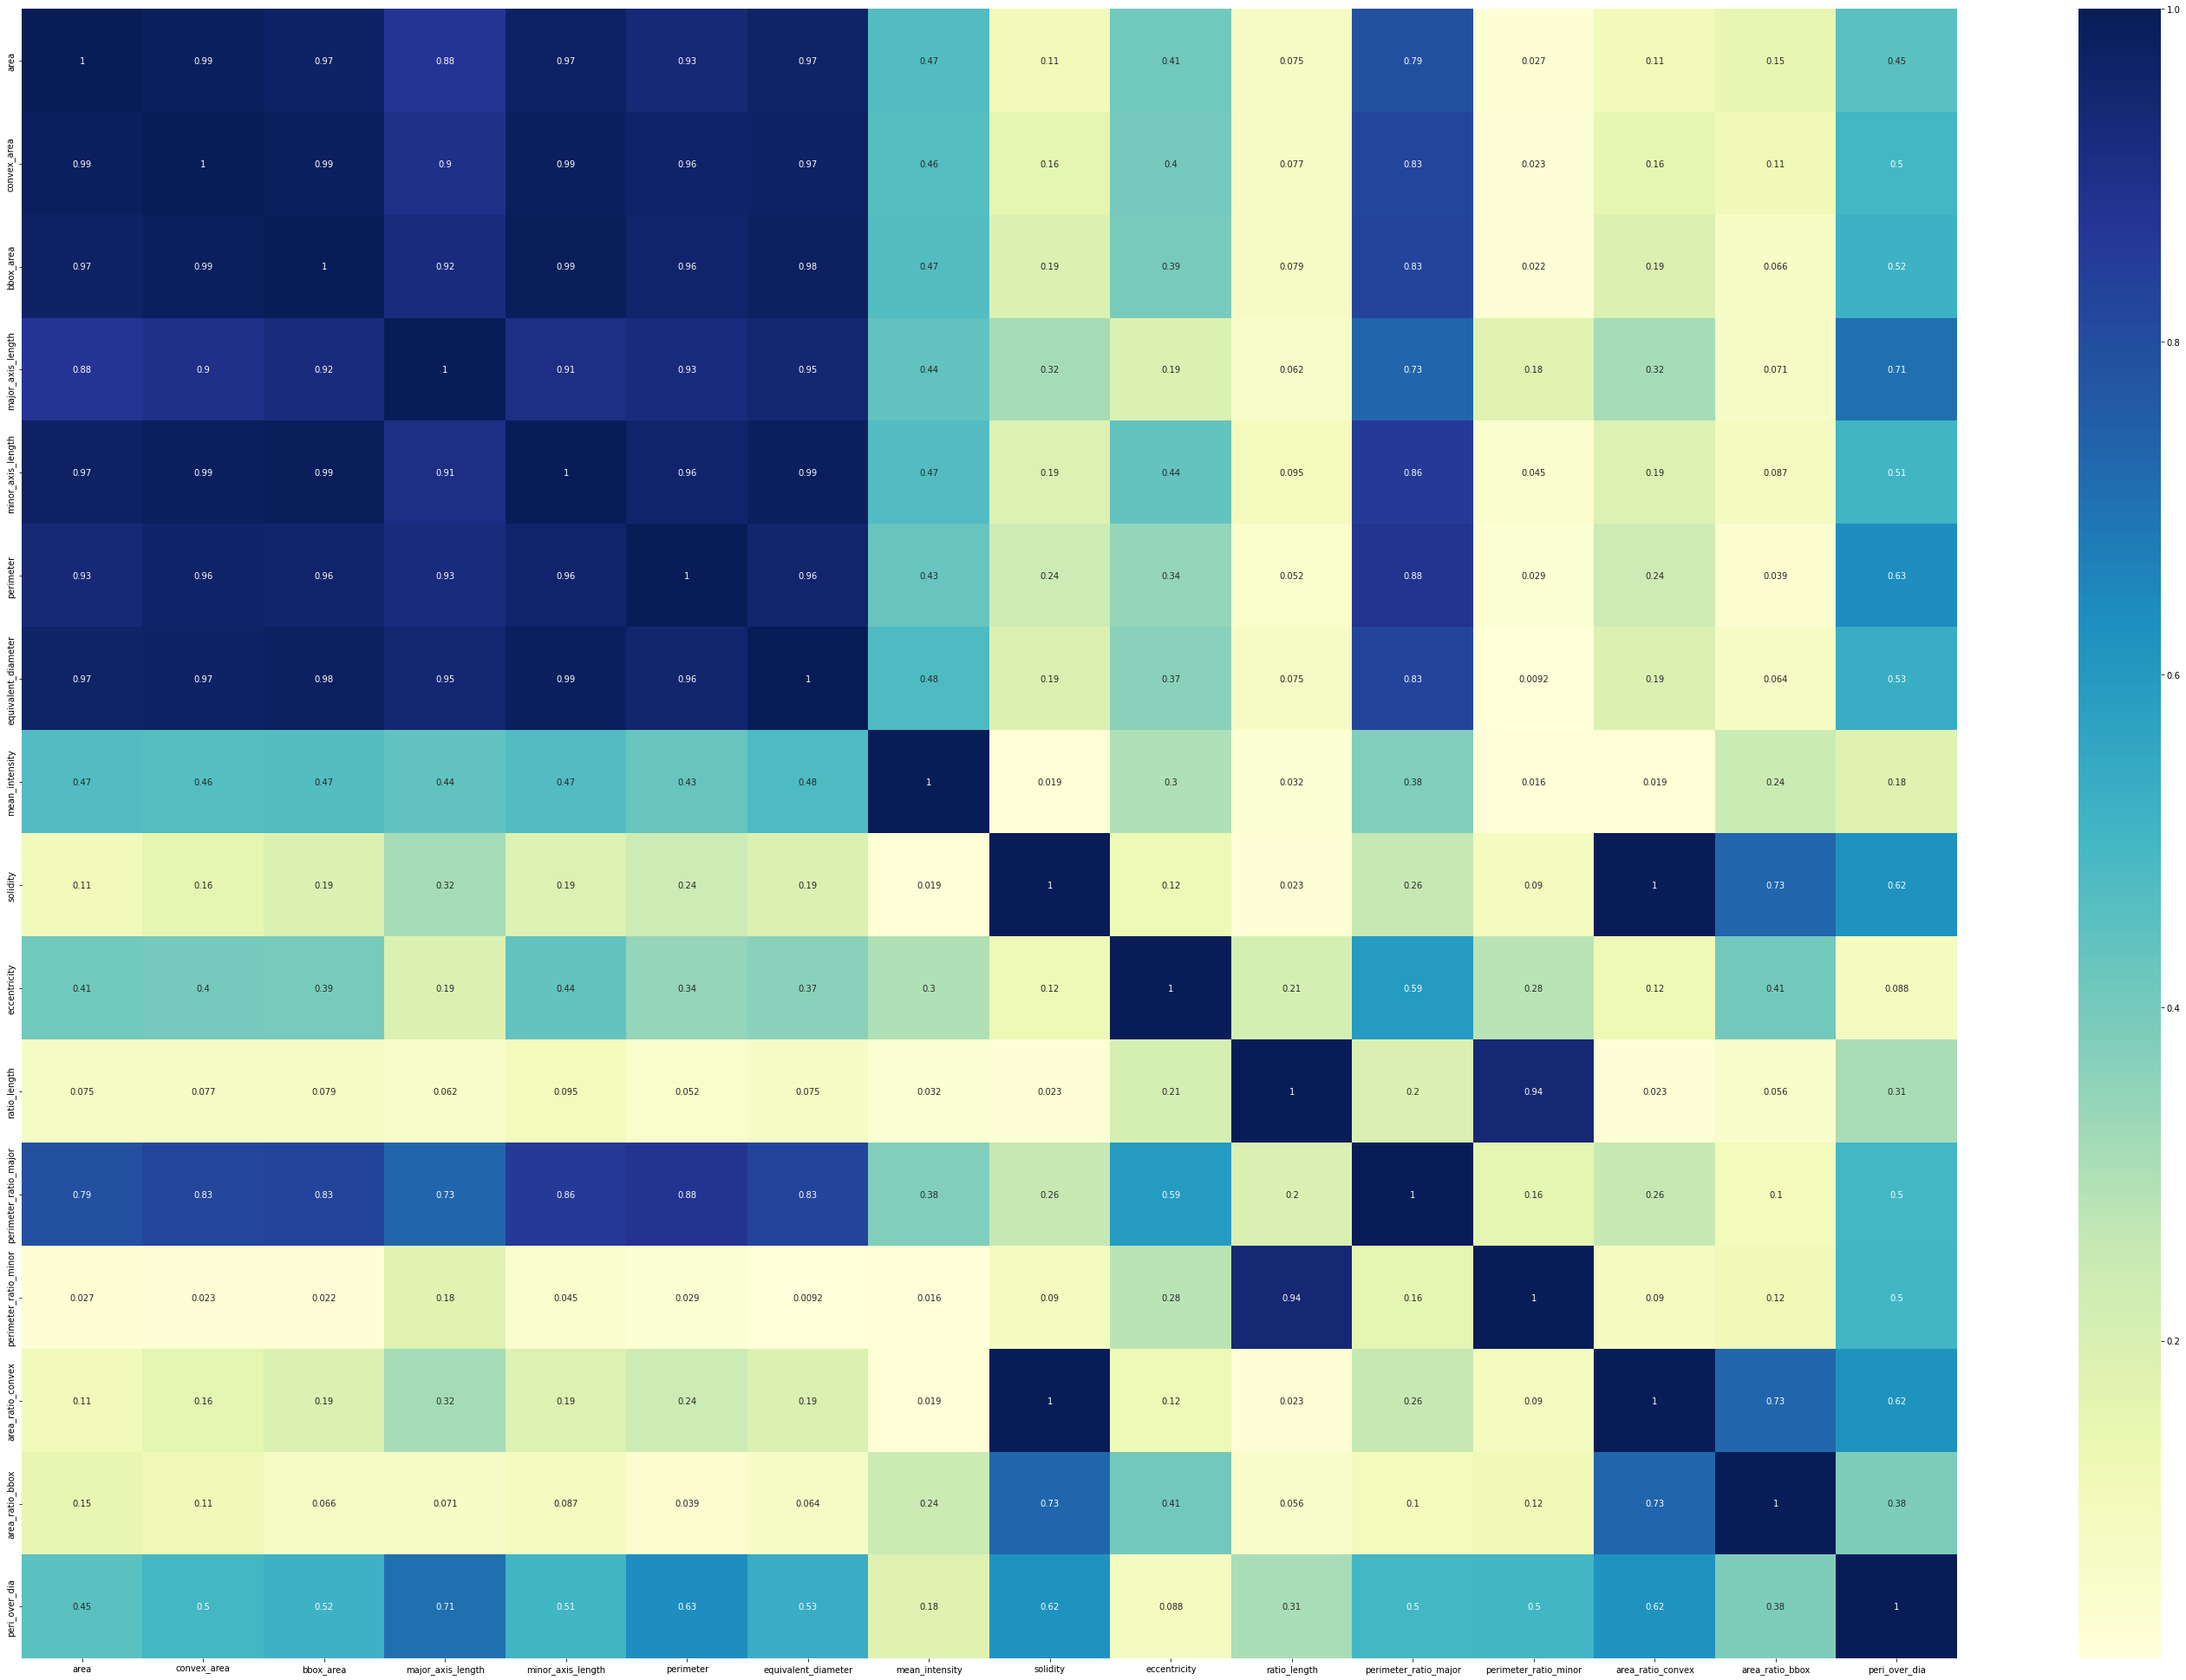

In [22]:
#Heatmap to check the collareation between the features
plt.figure(figsize = (50,35))
corr = data.corr().abs()
hm = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show() 

In [23]:
# Standraize data.
standardize_scaler = StandardScaler()
standardizedX = standardize_scaler.fit(X).transform(X)
X = pd.DataFrame(standardizedX)

## #3 Model

In [24]:
temp = pd.DataFrame(y)
print(temp.groupby('Finding').size())
print(X.shape)

Finding
0    9105
1    7857
dtype: int64
(16962, 16)


In [25]:
model_list = [LogisticRegression(random_state=111), svm.SVC(random_state=111), KNeighborsClassifier(n_neighbors=3), 
         GaussianNB(), DecisionTreeClassifier(random_state=111), RandomForestClassifier(random_state=111), 
         xgb.XGBClassifier(random_state=111)]

modelName_list = ['LR', 'SVM', 'KNN', 'NB', 'DT', 'RF', 'XGB']

In [26]:
cross_validator = ShuffleSplit(n_splits=10, random_state=111)
score_f1_list = []
score_recall_list = []
score_precision_list = []
for i in range(7):
  model = model_list[i]
  score_f1 = cross_val_score(model, X, y, scoring='f1_macro', cv=cross_validator).mean().round(2)
  score_f1_list.append(score_f1)
  score_recall = cross_val_score(model, X, y, scoring='recall_macro', cv=cross_validator).mean().round(2)
  score_recall_list.append(score_recall)
  score_precision = cross_val_score(model, X, y, scoring='precision_macro', cv=cross_validator).mean().round(2)
  score_precision_list.append(score_precision)
  print('The [F1-Score] of {} is {}:'.format(modelName_list[i], score_f1))
  print('The [Recall] of {} is: {}'.format(modelName_list[i], score_recall)) 
  print('The [Precision] of {} is: {}'.format(modelName_list[i], score_precision))
  print()

The [F1-Score] of LR is 0.57:
The [Recall] of LR is: 0.57
The [Precision] of LR is: 0.58

The [F1-Score] of SVM is 0.65:
The [Recall] of SVM is: 0.65
The [Precision] of SVM is: 0.65

The [F1-Score] of KNN is 0.67:
The [Recall] of KNN is: 0.67
The [Precision] of KNN is: 0.67

The [F1-Score] of NB is 0.48:
The [Recall] of NB is: 0.52
The [Precision] of NB is: 0.54

The [F1-Score] of DT is 0.65:
The [Recall] of DT is: 0.65
The [Precision] of DT is: 0.65

The [F1-Score] of RF is 0.7:
The [Recall] of RF is: 0.7
The [Precision] of RF is: 0.7

The [F1-Score] of XGB is 0.65:
The [Recall] of XGB is: 0.65
The [Precision] of XGB is: 0.65



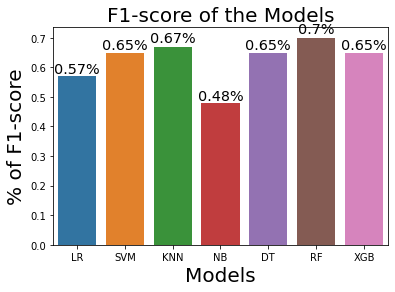

In [27]:
# Results visualization. [F1-score]
ax = sns.barplot(x=modelName_list, y=score_f1_list) #sns.barplot(x=model_names_list, y = 't', palette = "coolwarm", saturation =2.0, data=df)
plt.xlabel('Models', fontsize = 20)
plt.ylabel('% of F1-score', fontsize = 20)
plt.title('F1-score of the Models', fontsize = 20)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    xs, ys = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (xs + width/2, ys + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

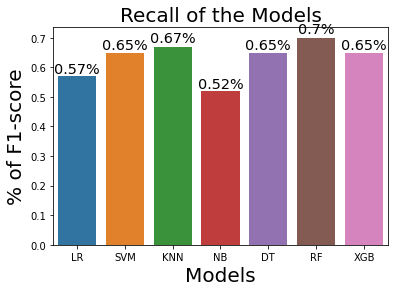

In [30]:
# Results visualization. [F1-score]
ax = sns.barplot(x=modelName_list, y=score_recall_list) #sns.barplot(x=model_names_list, y = 't', palette = "coolwarm", saturation =2.0, data=df)
plt.xlabel('Models', fontsize = 20)
plt.ylabel('% of F1-score', fontsize = 20)
plt.title('Recall of the Models', fontsize = 20)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    xs, ys = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (xs + width/2, ys + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

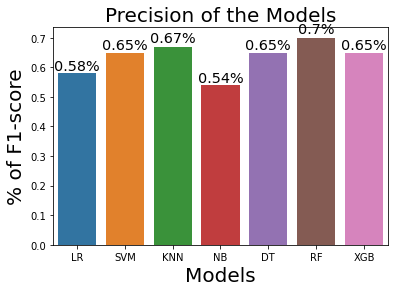

In [31]:
# Results visualization. [F1-score]
ax = sns.barplot(x=modelName_list, y=score_precision_list) #sns.barplot(x=model_names_list, y = 't', palette = "coolwarm", saturation =2.0, data=df)
plt.xlabel('Models', fontsize = 20)
plt.ylabel('% of F1-score', fontsize = 20)
plt.title('Precision of the Models', fontsize = 20)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    xs, ys = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (xs + width/2, ys + height*1.02), ha='center', fontsize = 'x-large')
plt.show()